In [10]:
import numpy as np
from matplotlib import pyplot as plt

import rescomp as rc
from rescomp import optimizer as rcopt

In [3]:
class EnsembleResComp:
    def __init__(self, n_reservoirs, driven=False, *args, **kwargs):
        self.n_reservoirs = n_reservoirs
        self.driven = driven
        
        if self.driven:
            self.reservoirs = [rc.DrivenResComp(*args, **kwargs)]
        else:
            self.reservoirs = [rc.ResComp(*args, **kwargs)]
    
    def train(self, *args, **kwargs):
        for res in self.reservoirs:
            res.train(*args, **kwargs)
        self.r0 = np.column_stack([res.r0 for res in self.reservoirs])
    
    """return_states is not supported"""
    def predict(self, *args, r0=None, return_states=False, **kwargs):
        if return_states:
            raise ValueError("return_states not supported")
        
        #Do shenanigans to make initial conditions work nicely
        if r0 is not None:
            predictions = [
                res.predict(*args, **kwargs) 
                for res_r0, res in zip(r0.T,self.reservoirs)
            ]
        else:
            predictions = [
                res.predict(*args, **kwargs) for res in self.reservoirs
            ]
        
        return np.mean(predictions, axis=0)

In [16]:
opt = rcopt.ResCompOptimizer('softrobot', 'random', 'continue', 'standard',
                      ResComp=EnsembleResComp, n_reservoirs=20, driven=True)

params = {'sigma': 0.5645314642668725, 'gamma': 18.803702703218782, 'ridge_alpha': 2.0, 'spect_rad': 0.1, 'mean_degree': 2.5093658627762454, 'delta': 0.5987635152501467}

result = opt.generate_orbits(1, parameters=params)
tr, (Utr, Dtr), (ts, Dts), Uts, pre = result[0]
rcopt.get_vptime(opt.system, (ts,None), Uts, pre)

0.6100043775622908

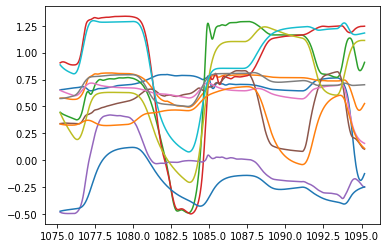

In [17]:
plt.plot(ts, Uts)
plt.plot(ts, pre)
plt.show()

1.120008037491516